In [ ]:
Importazione modulo pandas

In [5]:
import pandas as pd

data = pd.read_csv(r'C:\Users\ludov\OneDrive\Desktop\ufficiali\UFFICIALI\owid-covid-data.csv')


In [ ]:
Carico il dataset e stampo le prime 5 righe per controllare

In [6]:
import pandas as pd

# Carico il dataset
data = pd.read_csv(r'C:\Users\ludov\OneDrive\Desktop\ufficiali\UFFICIALI\owid-covid-data.csv')

# Stampo le prime 5 righe del DataFrame
print(data.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
•Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [7]:
data.shape

(387249, 67)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387249 entries, 0 to 387248
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387249 non-null  object 
 1   continent                                   368722 non-null  object 
 2   location                                    387249 non-null  object 
 3   date                                        387249 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [ ]:
•Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset 
non appartengono ad alcun continente

In [15]:
# Filtro il dataset per eliminare le locazioni
data_cleaned = data.dropna(subset=['continent'])

# Raggruppo i dati per continente e calcola tot di casi/continente
total_cases_per_continent = data_cleaned.groupby('continent')['total_cases'].sum()

# Stampo il tot di casi per continente
print("Numero totale di casi per continente:")
print(total_cases_per_continent)


Numero totale di casi per continente:
continent
Africa           1.277678e+10
Asia             2.099663e+11
Europe           2.013888e+11
North America    1.096626e+11
Oceania          9.506027e+09
South America    6.384417e+10
Name: total_cases, dtype: float64


In [ ]:
•Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: 
valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [17]:
# Inserisco la funzione per confrontare i descrittori statistici tra due continenti
def confronta_descrittori_statistici(continent1, continent2):
    # Filtra il dataset per i due continenti specificati
    continent1_data = data[data['continent'] == continent1]['total_cases']
    continent2_data = data[data['continent'] == continent2]['total_cases']
    
    # Calcolo il valore massimo per ciascun continente
    max_continent1 = continent1_data.max()
    max_continent2 = continent2_data.max()
    
    # Calcolo la media per ciascun continente
    mean_continent1 = continent1_data.mean()
    mean_continent2 = continent2_data.mean()
    
    # Calcolo il numero totale di casi nel mondo, incluso i casi delle locazioni senza indicazione di continente
    total_cases_world = data['total_cases'].sum()
    
    # Calcolo la percentuale rispetto al numero totale di casi nel mondo per ciascun continente
    percent_continent1 = continent1_data.sum() / total_cases_world * 100
    percent_continent2 = continent2_data.sum() / total_cases_world * 100
    
    # Stampo i descrittori statistici per i due continenti
    print(f"Confronto tra {continent1} e {continent2}:")
    print(f"Valore massimo: {continent1}: {max_continent1}, {continent2}: {max_continent2}")
    print(f"Media: {continent1}: {mean_continent1}, {continent2}: {mean_continent2}")
    print(f"Percentuale rispetto al numero totale di casi nel mondo: {continent1}: {percent_continent1:.2f}%, {continent2}: {percent_continent2:.2f}%")

# Eseguo il confronto tra Oceania e South America
confronta_descrittori_statistici('Oceania', 'South America')


Confronto tra Oceania e South America:
Valore massimo: Oceania: 11812024.0, South America: 37519960.0
Media: Oceania: 365503.9672023993, South America: 3108587.3989190767
Percentuale rispetto al numero totale di casi nel mondo: Oceania: 0.37%, South America: 2.48%


In [ ]:
•Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.
Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

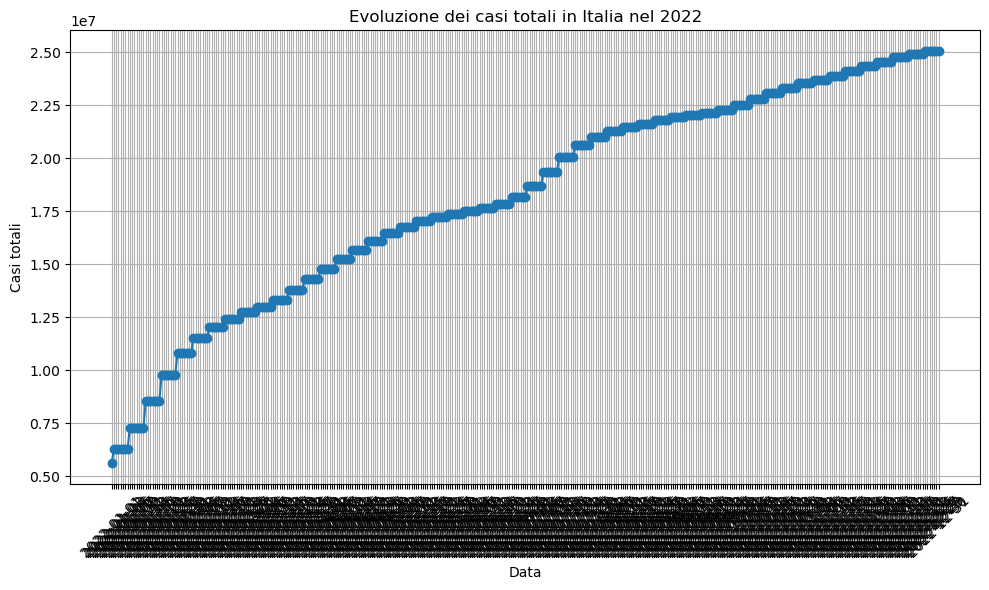

In [18]:
import matplotlib.pyplot as plt

# Filtro il dataset per selezionare solo i dati relativi all'Italia e al 2022
italy_data_2022 = data[(data['location'] == 'Italy') & (data['date'].str.startswith('2022'))]

# Traccio un grafico della serie temporale dei casi tot rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['total_cases'], marker='o', linestyle='-')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


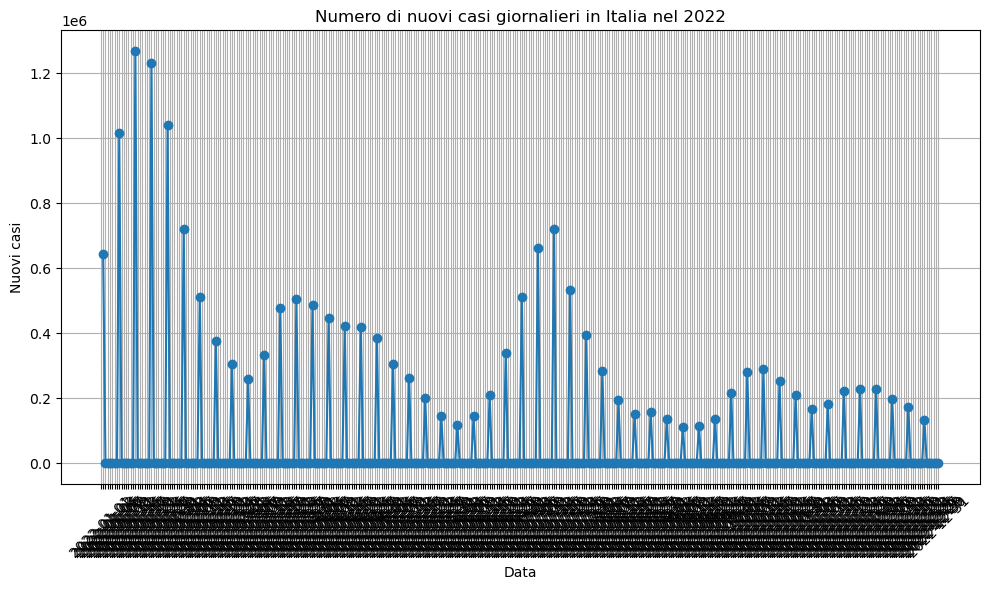

In [20]:
# Calcolo i nuovi casi giornalieri
italy_data_2022.loc[:, 'nuovi_casi'] = italy_data_2022['total_cases'].diff()

# Traccio un grafico della serie temporale dei nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['nuovi_casi'], marker='o', linestyle='-')
plt.title('Numero di nuovi casi giornalieri in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


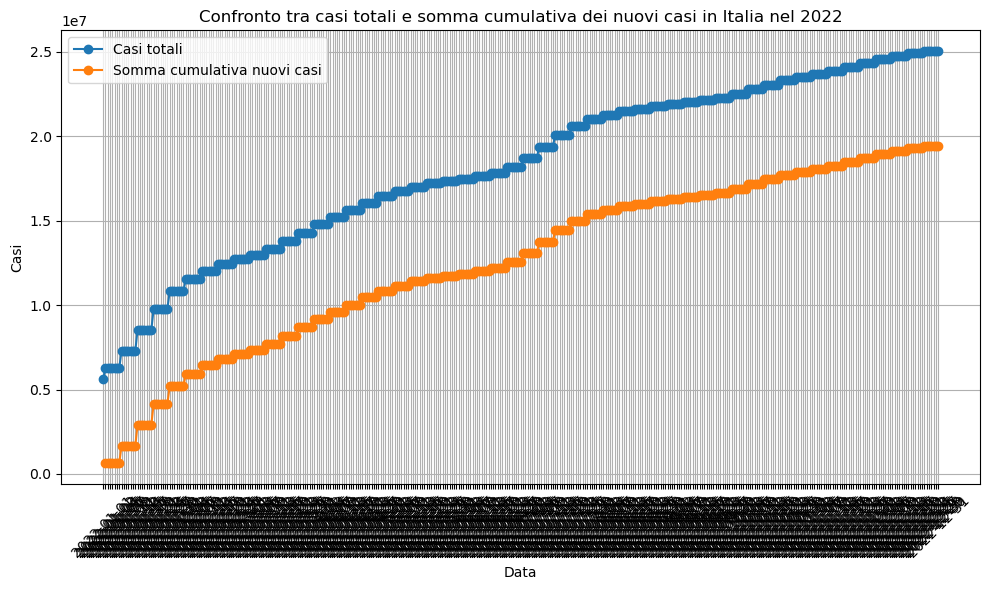

In [22]:
# Calcolo la somma cumulativa dei nuovi casi
italy_data_2022.loc[:, 'cumulative_nuovi_casi'] = italy_data_2022['nuovi_casi'].cumsum()

# Traccio un grafico che mostra l'andamento della somma cumulativa dei nuovi casi nel 2022
# e confronto con l'andamento dei casi tot
plt.figure(figsize=(10, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['total_cases'], label='Casi totali', marker='o', linestyle='-')
plt.plot(italy_data_2022['date'], italy_data_2022['cumulative_nuovi_casi'], label='Somma cumulativa nuovi casi', marker='o', linestyle='-')
plt.title('Confronto tra casi totali e somma cumulativa dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
•Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti
in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

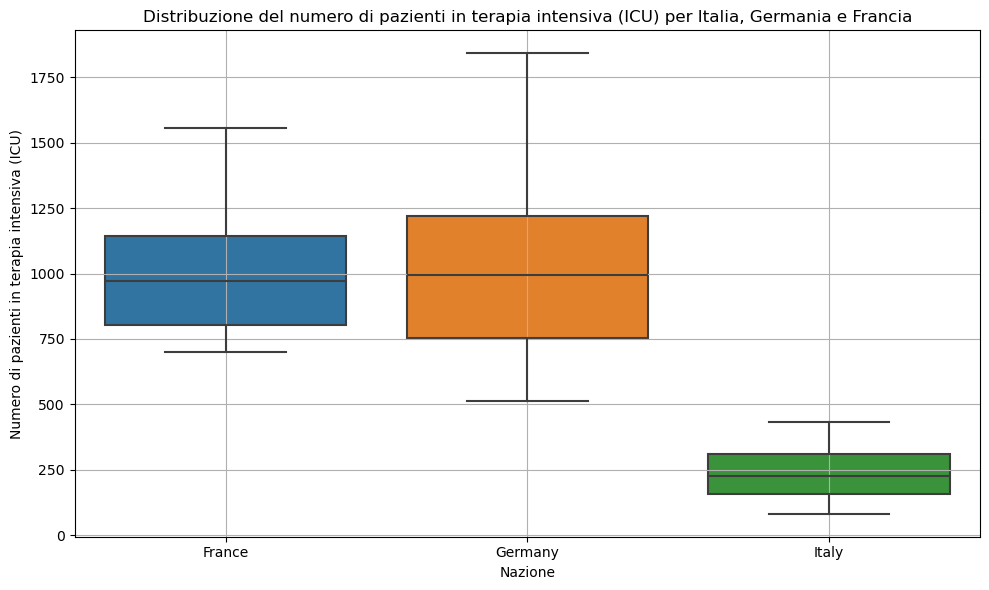

In [24]:
import seaborn as sns  # Aggiunto l'import di seaborn

# Filtro il dataset per selezionare solo i dati relativi a Italia, Germania e Francia dal maggio 2022 all'aprile 2023
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'
filtered_data = data[(data['location'].isin(countries)) & (data['date'] >= start_date) & (data['date'] <= end_date)]

# Traccio un boxplot per visualizzare la distribuzione del numero di pazienti in terapia intensiva (ICU) per ciascuna nazione
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=filtered_data)
plt.title('Distribuzione del numero di pazienti in terapia intensiva (ICU) per Italia, Germania e Francia')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Breve commento:


In [ ]:

Il grafico mostra quanti pazienti sono stati in terapia intensiva (ICU) in Italia, Germania e Francia tra maggio 2022 e aprile 2023.

Osservando il grafico notiamo:

In Italia, sembra ci siano stati più pazienti ICU rispetto agli altri due paesi, con una certa variazione nel numero di pazienti nel corso del tempo.
Per la Germania, il numero di pazienti ICU sembra essere più stabile rispetto agli altri due paesi, con meno variazione.
La Francia ha una distribuzione più ampia, il che significa che c'è stata una maggiore variazione nel numero di pazienti ICU nel periodo considerato.
Queste differenze possono essere dovute a vari fattori, come le diverse strategie di gestione della pandemia e le risorse sanitarie 
disponibili nei tre paesi. Sarebbe interessante esaminare ulteriormente questi dati per comprendere meglio le differenze osservate.

In [ ]:
•Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospedalizzati per ognuna
- se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [ ]:
Utilizzo hosp_patients come pazienti ospedalizzati

In [30]:
# Filtro il dataset per selezionare solo i dati relativi a Italia, Germania, Francia e Spagna nel 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
year = '2023'
filtered_data_2023 = data[(data['location'].isin(countries)) & (data['date'].str.startswith(year))]

# Calcolo la somma dei pazienti ospedalizzati per ciascuna nazione utilizzando la colonna 'hosp_patients'
hospitalized_sum = filtered_data_2023.groupby('location')['hosp_patients'].sum()

# Stam la somma dei pazienti ospedalizzati per ogni nazione
print(hospitalized_sum)


location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
